# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #09</span>

All'interno della nona lezione teorica, abbiamo introdotto e descritto varie tecniche di ricerca stocastica e **ottimizzazione**. Come abbiamo visto, si tratta fondamentalmente di metodi per la ricerca di punti stazionari (nel nostro caso ci siamo concentrati sulla ricerca dei minimi) di una funzione. Tra gli algoritmi trattati ricordo:

- **Simulated Annealing**;
- **Genetic Algoritm**.

Il Simulated Annealing consiste nell'applicazione dei princicipi di Meccanica Statistica e si basa  su un importante fenomeno  termodinamico: la cristallizzazione di un liquido a basse temperature. Sappiamo infatti che raffreddando lentamente un sistema termodinamico ($e.g.$ un liquido), esso tenderà spontaneamente a raggiungere la configurazione di minima energia. Tornando all'esempio del cristallo, è importante ricordare che se il processo di raffreddamento avverrà troppo rapidamente, sarà molto difficile evitare la formazione di strutture policristalline o amorfe. La seconda tecnica riportata sopra, si basa invece, come intuibile dalla denominazione, sui processi biologici di evoluzione genetica e di selezione naturale per adattamento. Nello specifico, si genera un campione iniziale di individui e lo si sottopone a mutazioni e incroci, studiandone l'evoluzione nel tempo. Favorendo la riproduzione (o incrocio) tra gli individui *'migliori'*, ci si aspetta che dopo un certo numero di step evolutivi la popolazione tenda a convergere verso il carattere dominante della specie.

<font color="blue">**N.B.**</font> il termine *'migliori'* è ovviamente legato al criterio di ottimizzazione scelto.

### <span style="color:darkorange"> Esercizio 09.1</span>

La richiesta dell'esercizio riguardava la scrittura di un codice in grado di risolvere il problema del commesso viaggiatore (**TSP**): fissate su un piano bidimensionale le posizioni di $l$ città, ci si interroga su quale sia il percorso più breve che il nostro viaggiatore può seguire, visitando tutte le città una volta sola e tornando, alla fine del tragitto, al punto di partenza. Si tratta chiaramente di un problema di ottimizzazione, in cui si vuole ricavare, fissato il numero di città da visitare ($\vec{x}_i$ per $i = 1,2,...,l$), il percorso che minimizza (come minimo globale) il funzionale lunghezza così definito:

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_l) = \sum_{i=1}^{l} |\vec{x}_i-\vec{x}_{i+1}|
$$

con condizione al contorno $\vec{x}_{l+1}=\vec{x}_1$. L'esercizio consisteva quindi nell'implementare un'algoritmo di evoluzione genetica in modo da risolvere il TSP e quindi calcolare il miglior cammino possibile, nelle seguenti due condizioni:

- 32 città disposte randomicamente lungo una circonferenza di raggio $R=1$;
- 32 città disposte randomicamente all'interno di un quadrato di lato $a=1$.

In entrambi i casi, ho dovuto prima di tutto generare le città sulla mappa seguendo le richieste e, contemporaneamente, ho inserito le loro posizioni all'interno di un oggetto *map* della STL. In questo modo ho infatti potuto etichettare ognuna di esse con un numero intero compreso tra $1$ e $l$, in modo da codificare l'informazione rendendola più maneggevole e più facilmente accessibile, attraverso l'ultilizzo degli *iteratori*. In seconda battuta, mi sono poi occupato della creazione di una popolazione iniziale costituita da $N=100$ individui, utilizzando un array di classi. Ognuno di questi individui era rappresentato da un array di interi di dimensione $l$, tale che ad ogni componente era associato un numero intero tra $1$ e $l$, soddisfacente la condizione al contorno del problema enunciata sopra: tutte le componenti dovranno essere distinte. L'ordine in cui comparivano questi numeri identificava quindi in modo univoco un possibile percorso all'interno della mappa. Chiaramente questa popolazione di partenza doveva essere generata in modo randomico, per fare ciò ho costruito inizialmente ogni array ordinando le sue componenti in ordine crescente da $1$ a $l$. Successivamente ho chiamato $k$ volte (numero intero estratto casualmente tra $1$ e $10l$) un algoritmo di scambio delle componenti (vedi sotto), per modificare la struttura interna del vettore. Per diminuire il grado di degenerazione del problema, relativo in particolare alla non univocità del punto di partenza, ho implementato questo settaggio randomico iniziale, e anche tutti gli algoritmi di evoluzione genetica, in modo tale che ogni percorso partisse sempre dalla prima città generata sulla mappa, codificata dal valore $1$.

Una volta ottenuta la mia popolazione iniziale, mi sono dovuto preoccupare della fase di evoluzione genetica, che possiamo idealmente dividere in tre fasi:

1. Selezione: estraggo due individui favoriti dall'ottimizzazione;
2. Incrocio (o *Crossover*): mischio il codice genetico dei due individui selezionati;
3. Mutazione: modifico la struttura genetica dei due nuovi individui;

Ripetendo questi passaggi $l/2$ volte si ottiene una nuova generazione da sostituire alla precedente. Per implementare l'algoritmo di selezione, ho prima di tutto ordinato la mia popolazione secondo la lunghezza del percorso in ordine crescente. A questo punto è stato possibile estrarre un indice $j$ come $j=int(N\times r^p)$ con $r$ estratto uniformemente nell'intervallo $[0,1)$, e fissando il valore di $p$ in modo da modulare la tendenza dell'algoritmo a estrapolare i campioni migliori possibili della popolazione, $i.e.$ quelli con indici più vicini a zero (nelle mie simulazioni ho fissato $p=4$). Selezionando due cammini distinti, ho potuto eseguire l'incrocio con probabilità $p_c = 70\%$, nel seguente modo: estrapolo un numero intero $n$ tra $2$ e $l/2$, che utilizzo per eliminare le ultime $n$ tappe del primo percorso, le quali vengono successivamente riempite seguendo l'ordine impartito dal secondo individuo. Una volta applicato questo metodo ad entrambi i percorsi iniziali e ottenuti due individui della nuova generazione, ho sottoposto questi ultimi a una serie mutazione genetiche, costruite in modo da garantire la condizione di ergodicità dell'algoritmo di ottimizzazione.

- permutazione a coppie (scambio) delle città (tranne che per la prima) con probablitia $p=10\%$;
- shift di $+n$ posizioni per $m$ città contigue (tranne che per la prima e $m \lt N-1$), le restanti componenti non traslate venivano riempite seguendo l'ordine di comparsa all'interno del tragitto di partenza con probablitia $p=7\%$;
- permutazione di $m$ città contigue (tranne che per la prima) con altre $m$ città contigue distinte ($m<N/2$) con probablitia $p=10\%$;
- inversione dell'ordine di comparsa nel percorso di $m$ città (tranne che per la prima e $m \le N$) con probablitia $p=10\%$.

Ultimata la scrittura del codice, ho applicato il mio algoritmo genetico per risolvere il TSP nelle due condizioni richieste. Nel caso di città disposte lungo una circonferenza, ho simulato un numero di step evolutivi pari a $2 \cdot 10^4$, e ho misurato sia la lunghezza del tragitto del campione migliore per ogni generazione, sia il valore d'aspettazione, con rispettiva incertezza statistica, mediato su i primi $50$ individui della popolazione finale. I risultati sono riportati di seguito.

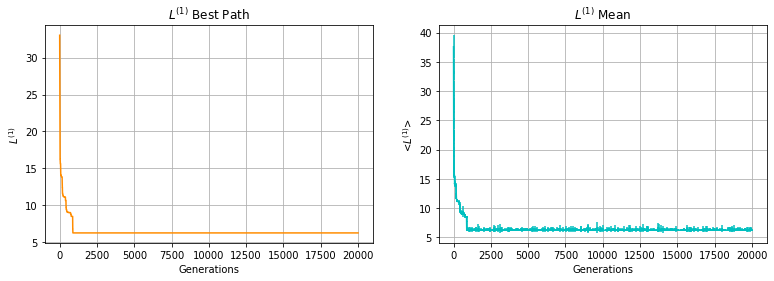

 Final Lenght of Best Path = 6.2403


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

n,best = np.loadtxt("Circonference/best.path.0", usecols=(0,1), delimiter=' ', unpack='true')
n,mean,err_mean = np.loadtxt("Circonference/mean.path.0", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n,best,color='darkorange')
plt.title('$L^{(1)}$ Best Path')
plt.xlabel('Generations')
plt.ylabel('$L^{(1)}$')
plt.grid(True)

plt.subplot(132)
plt.errorbar(n,mean,err_mean,color='c')
plt.title('$L^{(1)}$ Mean')
plt.xlabel('Generations')
plt.ylabel('<$L^{(1)}$>')
plt.grid(True)

plt.show()

n = 20000
print(" Final Lenght of Best Path = "+str(best[n-1]))

Vediamo come il processo di evoluzione converga molto velocemente verso quello che ci aspettiamo essere il minimo globale del funzionale lunghezza. Inoltre, in accordo con quanto atteso, notiamo che la lunghezza totale del percorso ottimizzato è di poco più piccola, con uno scarto alla seconda cifra decimale, del valore $2\pi$ coincidente con la circonferenza di un cerchio di raggio unitario.

Nel pannello sottostante ho riportato anche un plot del tragitto migliore alla fine del processo evolutivo.

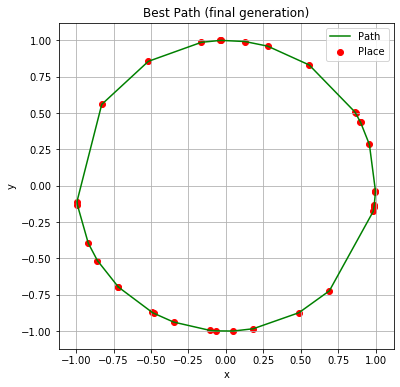

In [3]:
x,y = np.loadtxt("Circonference/final.path.0", usecols=(1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(6, 6))
plt.plot(x,y,color='g',label='Path')
plt.scatter(x,y,color='r',label='Place')
plt.title('Best Path (final generation)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

Come mi aspetto, il percorso più breve è quello che passa per tutti i punti seguendo il loro ordine lungo la circonferenza, il che fa sì che la lunghezza del tragitto migliore sia prossima al valore $2 \pi$, come osservato sopra.

Successivamente ho ripetuto la mia simulazione su un problema decisamente più complicato e, contrariamente al caso precedente, non facilmente risolvibile dal punto di vista analitico: ricerca del tragitto di minor lunghezza che colleghi $32$ città disposte casualmente all'interno di un quadrato. Questa volta ho simulato un numero di step evolutivi pari a $5\cdot 10^4$ e ho plottato nuovamente l'andamento della lunghezza del percorso migliore e del suo valore d'aspettazione mediato sui primi $50$ individui della popolazione finale. All'interno della simulazione, ho inoltre aumentato la probabilità di mutazione del campione per shift portandola al $10 \%$, in modo da aumentare l'ergodicità del processo, riducendo la possibilità dell'algoritmo di stazionare in presenza di configurazioni di minimo locale.

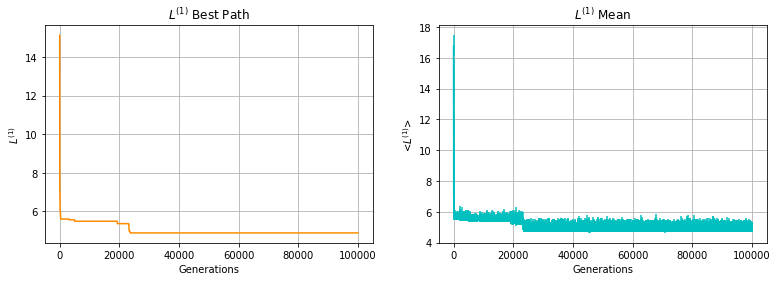

 Final Lenght of Best Path = 4.88757


In [4]:
n,best = np.loadtxt("Square/best.path.0", usecols=(0,1), delimiter=' ', unpack='true')
n,mean,err_mean = np.loadtxt("Square/mean.path.0", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(n,best,color='darkorange')
plt.title('$L^{(1)}$ Best Path')
plt.xlabel('Generations')
plt.ylabel('$L^{(1)}$')
plt.grid(True)

plt.subplot(132)
plt.errorbar(n,mean,err_mean,color='c')
plt.title('$L^{(1)}$ Mean')
plt.xlabel('Generations')
plt.ylabel('<$L^{(1)}$>')
plt.grid(True)

plt.show()

n = 30000
print(" Final Lenght of Best Path = "+str(best[n-1]))

Notiamo subito come la ricerca del minimo globale sia più costosa in termini computazionali rispetto al caso precedente. In virtù della complessità del problema e come si osserva dai grafici, il mio algoritmo di evoluzione tende a stagnare in corrispondenza di configurazioni di minimo locale per un gran numero di step. 

Di seguito ho riportato un'immagine del tragitto migliore ottenuto a simulazione terminata.

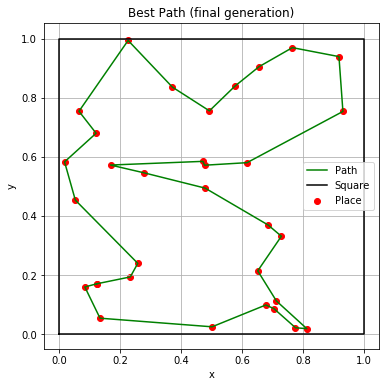

In [5]:
x,y = np.loadtxt("Square/final.path.0", usecols=(1,2), delimiter=' ', unpack='true')

a = 1
x_square = [0,a,a,0,0]
y_square = [0,0,a,a,0]

plt.figure(figsize=(6, 6))
plt.plot(x,y,color='g',label='Path')
plt.plot(x_square,y_square,color='black',label='Square')
plt.scatter(x,y,color='r',label='Place')
plt.title('Best Path (final generation)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In virtù della complessità del problema, questa volta non è possibile stabilire a priori se il tragitto ottenuto rappresenta  un minimo locale o globale del funzionale $L^{(1)}$.